In [2]:
# Sección 1: Cargar y preprocesar los datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Cargar el dataset
data = pd.read_csv(r'C:\Users\ronal\Titanic-Dataset.csv')

# Visualizar las primeras filas del dataset
print(data.head())

# Verificar si hay valores nulos
print(data.isnull().sum())

# Rellenar valores nulos en 'Age' con la media (sin usar inplace=True)
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Asignar el valor resultante directamente

# Rellenar valores nulos en 'Embarked' con el valor más frecuente (sin usar inplace=True)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Asignar el valor resultante directamente

# Reemplazar valores categóricos 'Sex' y 'Embarked' por números
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Eliminar la columna 'Name', 'Ticket' y 'Cabin' (no necesarias para el modelo)
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Verificar los datos después de los cambios
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

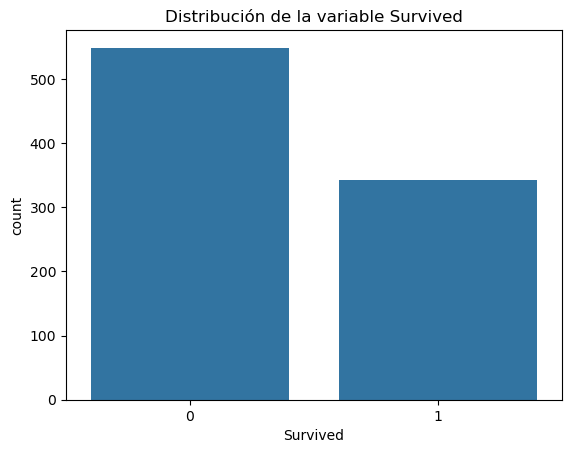

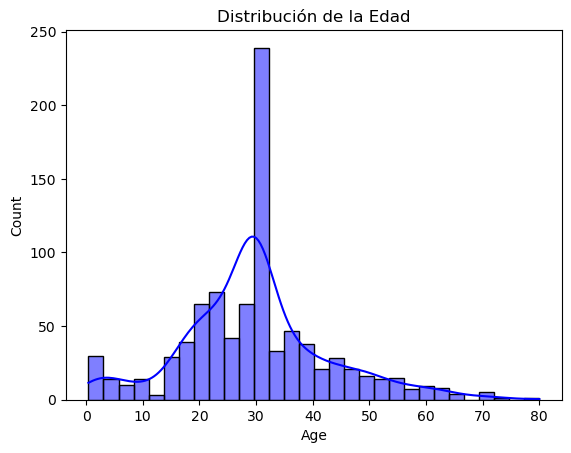

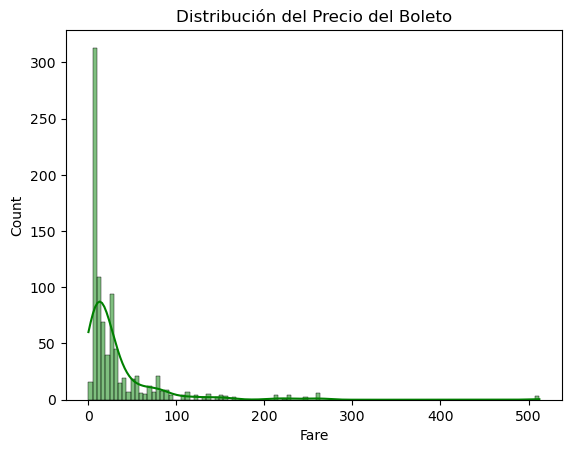

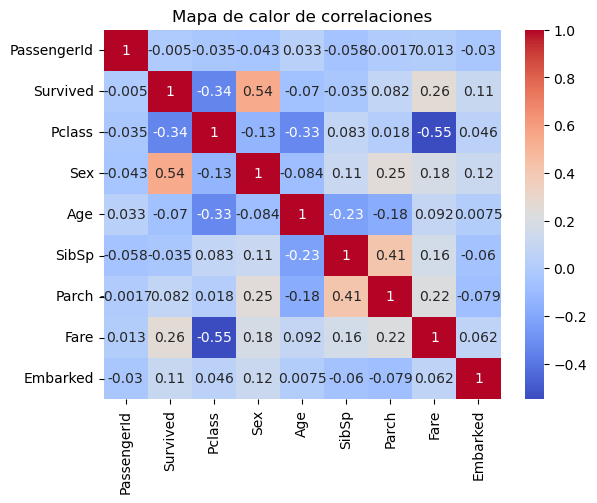

In [43]:
# Sección 2: Análisis exploratorio de los datos

# Visualización de la distribución de la variable objetivo 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Distribución de la variable Survived')
plt.show()

# Visualización de la distribución de las edades
sns.histplot(data['Age'].dropna(), kde=True, color='blue')
plt.title('Distribución de la Edad')
plt.show()

# Visualización de la distribución del precio del boleto
sns.histplot(data['Fare'], kde=True, color='green')
plt.title('Distribución del Precio del Boleto')
plt.show()

# Correlación entre las variables numéricas
numeric_data = data.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


In [44]:
# Sección 3: División de datos en entrenamiento y prueba

# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['Survived'])  # Eliminar la columna objetivo 'Survived'
y = data['Survived']  # Variable objetivo 'Survived'

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(712, 8) (179, 8) (712,) (179,)


In [45]:
# Sección 4: Entrenamiento del modelo de regresión logística

# Crear el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = log_reg.predict(X_test)

Precisión del modelo: 79.89%
Matriz de confusión:
[[89 16]
 [20 54]]


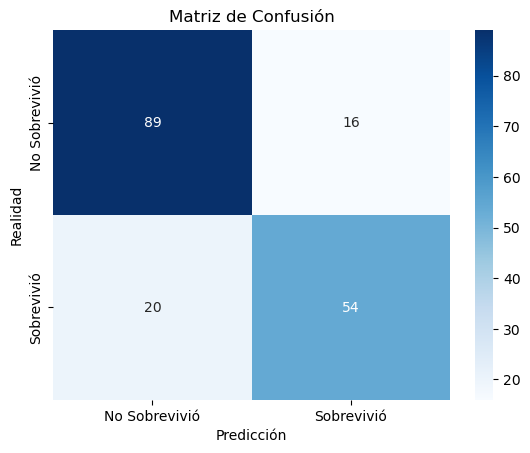

In [46]:
# Sección 5: Evaluación del modelo

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

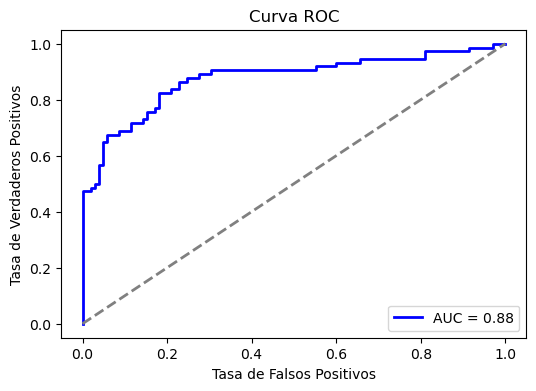

In [4]:

# Dividir el dataset en variables independientes (X) y dependiente (y)
X = data.drop(columns=['Survived'])  # Variables predictoras
y = data['Survived']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

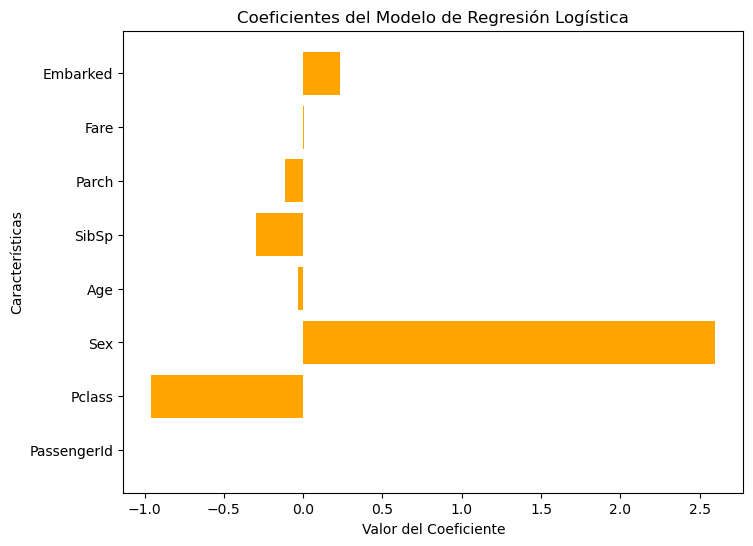

In [6]:
# Dividir el dataset en variables predictoras (X) y objetivo (y)
X = data.drop(columns=['Survived'])  # Características numéricas y categóricas
y = data['Survived']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Obtener los coeficientes del modelo
coef = model.coef_[0]

# Obtener las características numéricas (columnas) del dataset
numeric_features = X.select_dtypes(include=[np.number]).columns

# Visualizar los coeficientes
plt.figure(figsize=(8, 6))
plt.barh(numeric_features, coef, color='orange')
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Características')
plt.show()

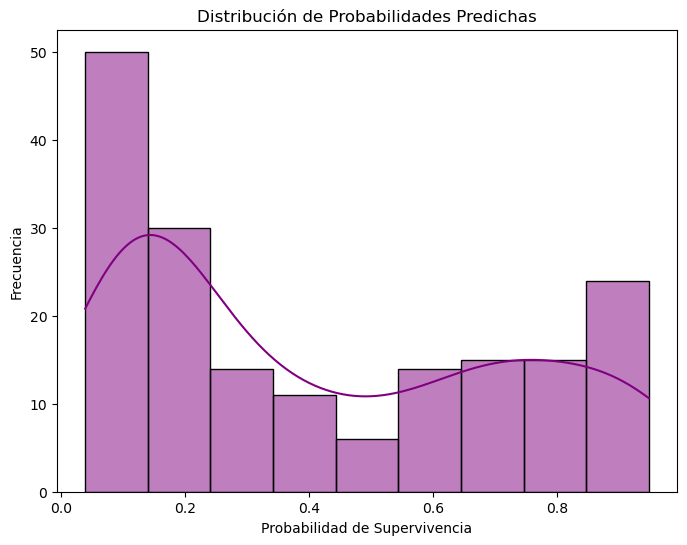

In [7]:
# Obtener las probabilidades predichas
y_prob = model.predict_proba(X_test)[:, 1]

# Visualizar la distribución de probabilidades
plt.figure(figsize=(8, 6))
sns.histplot(y_prob, kde=True, color='purple')
plt.title('Distribución de Probabilidades Predichas')
plt.xlabel('Probabilidad de Supervivencia')
plt.ylabel('Frecuencia')
plt.show()


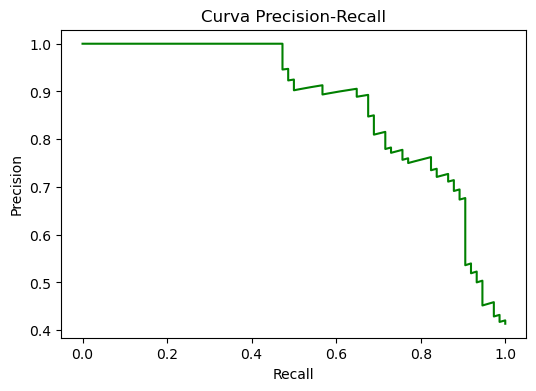

In [8]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Visualizar la curva Precision-Recall
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
